#### cos함수를 이용하여 데이터 만들기

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
np.random.seed(2020)

time = np.arange(30 * 12 + 1)
month_time = (time % 30) / 30
time_series = 20 * np.where(month_time<0.5, 
                       np.cos(2 * np.pi*month_time), np.cos(2 * np.pi*month_time)+np.random.random(361))

In [3]:
print(time[-5:])
print(month_time[-5:])
print(time_series[-5:])

[356 357 358 359 360]
[0.86666667 0.9        0.93333333 0.96666667 0.        ]
[32.97641254 28.86423556 34.38901865 22.67349615 20.        ]


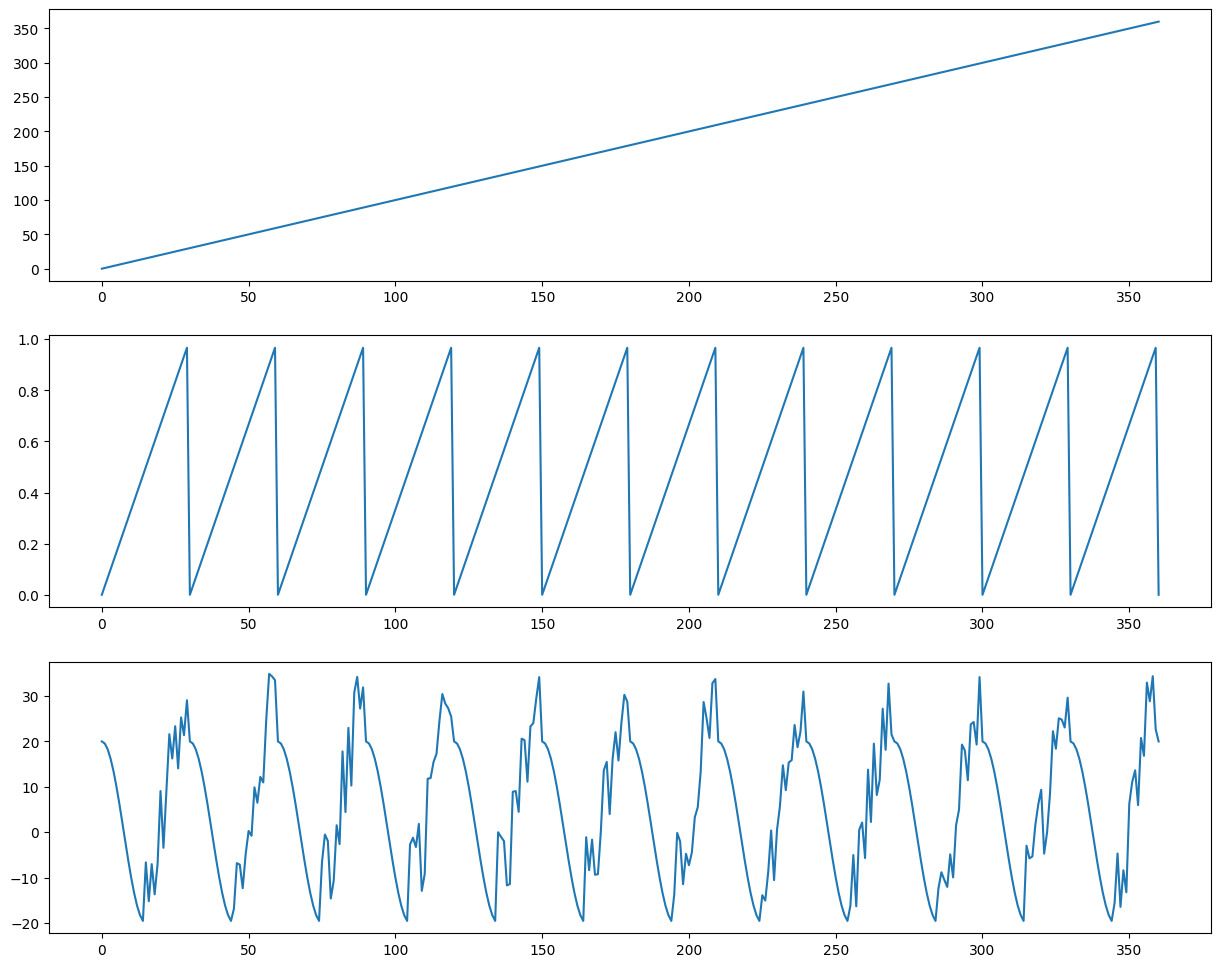

In [5]:
plt.figure(figsize=(15, 12))
plt.subplot(3,1,1)
plt.plot(time)
plt.subplot(3,1,2)
plt.plot(month_time)
plt.subplot(3,1,3)
plt.plot(time_series)

plt.show()

In [6]:
# train data vs. test data
time_sep = 30 * 11 + 1
x_train = time_series[: time_sep]
x_test =  time_series[time_sep :]
print(len(x_train), len(x_test))

331 30


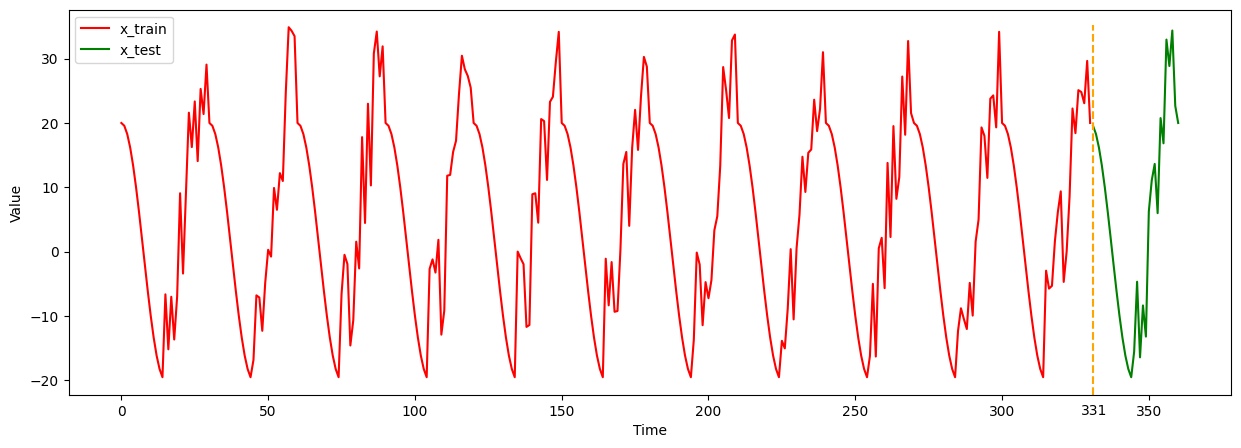

In [12]:
plt.figure(figsize=(15,5))
plt.plot(np.arange(time_sep), x_train, color='red', label='x_train')
plt.plot(np.arange(time_sep, 361), x_test, color='green', label='x_test')
plt.axvline(x=time_sep, color='orange', linestyle='--', ymax=0.96)
plt.text(time_sep-4, -25.4, s=time_sep)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [13]:
# 모델의 입력으로 사용하기 위해 x_train과 x_test를 전처리 과정을 수행한다.
def make_sequence(time_series, n):
    x_train, y_train = [],[]
    
    for i in range(len(time_series)):
        x = time_series[i : (i+n)]
        if(i + n) < len(time_series):
            x_train.append(x)
            y_train.append(time_series[i+n])
        else: break
    return np.array(x_train), np.array(y_train)

In [14]:
n = 10
x_train, y_train = make_sequence(time_series, 10)

print(x_train.shape, y_train.shape)
for i in range(5):
    print(f"{i}th x_train : {[np.round(k, 2) for k in x_train[i]]}, {i}th y_train :{np.round(y_train[i], 2)}")
    
print()
print(len(x_train), len(y_train))
print()

x_train = x_train.reshape(-1, n, 1)
y_train = y_train.reshape(-1, 1)

print(x_train.shape, y_train.shape)
print()

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.1, random_state=123)
print(f"x_train의 shape : {x_train.shape},  y_train의 shape : {y_train.shape}")
print(f"x_test의 shape : {x_test.shape}, y_test의 shape : {y_test.shape}")

(351, 10) (351,)
0th x_train : [20.0, 19.56, 18.27, 16.18, 13.38, 10.0, 6.18, 2.09, -2.09, -6.18], 0th y_train :-10.0
1th x_train : [19.56, 18.27, 16.18, 13.38, 10.0, 6.18, 2.09, -2.09, -6.18, -10.0], 1th y_train :-13.38
2th x_train : [18.27, 16.18, 13.38, 10.0, 6.18, 2.09, -2.09, -6.18, -10.0, -13.38], 2th y_train :-16.18
3th x_train : [16.18, 13.38, 10.0, 6.18, 2.09, -2.09, -6.18, -10.0, -13.38, -16.18], 3th y_train :-18.27
4th x_train : [13.38, 10.0, 6.18, 2.09, -2.09, -6.18, -10.0, -13.38, -16.18, -18.27], 4th y_train :-19.56

351 351

(351, 10, 1) (351, 1)

x_train의 shape : (315, 10, 1),  y_train의 shape : (315, 1)
x_test의 shape : (36, 10, 1), y_test의 shape : (36, 1)


In [15]:
# make_sequence 함수 확인해보기
test_arr = np.arange(100)
a, b = make_sequence(test_arr, 10)

for i in range(1, 5):
    print(a[i], '|', b[i])


[ 1  2  3  4  5  6  7  8  9 10] | 11
[ 2  3  4  5  6  7  8  9 10 11] | 12
[ 3  4  5  6  7  8  9 10 11 12] | 13
[ 4  5  6  7  8  9 10 11 12 13] | 14


In [10]:
np.save(file='../순환신경망/x_train_cos', arr=x_train)
np.save(file='../순환신경망/y_train_cos', arr=y_train)
np.save(file='../순환신경망/x_test_cost', arr=x_test)
np.save(file='../순환신경망/y_test_cos', arr=y_test)